# Stationary freatic flow between two water courses above a semi-pervious layer (Wesseling)

<img src="Wesseling_profile_sketch.gif" width="382" height="267" align="left"/>

Constant precipitation N on a strip of land between two parallel water courses with water level hs causes a rise h(x) of the groundwater level that induces in a groundwater flow towards the water courses. The phreatic groundwater is separated from an aquifer below by a semi-pervious layer. The interaction between phreatic groundwater system and the aquifer is determined by the resistance c of the semi-pervious layer and the groundwater head H in the aquifer below.  

A solution was published by Wesseling & Wesseling (1984). A practical dicussion is provided by Van Drecht (1997, in Dutch)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def hx(x,L,hs,p,H,c,T):
    """Return phreatic groundwater level h(x) between two water courses
    
    Parameters:
    x  : numpy array
        Distance from centre of the water course (m)
    L  : float
        Distance between the centre of both water courses (m)
    hs : float
        water level in the water courses (m)
    p  : float
        precipitation (m/day)
    H  : float
        groundwater head in the deep aquifer (m)
    c  : float
        resistance of semi-pervious layer (day) 
    T  : float
        transmissivity of the deep aquifer (m2/day)

    Returns
    -------
    numpy array

    """
    labda = np.sqrt(T*c)
    alpha = L / (2*labda)
    hx = hs + (H - hs + p*c)* (np.tanh(alpha) * np.sinh(x/labda) - np.cosh(x/labda) + 1)
    return hx

In [99]:
def qd(L,hs,p,H,c,T):
    """Return groundwater discharge to water courses"""
    labda = np.sqrt(T*c)
    alpha = L / (2*labda)
    qd = ((H-hs)/c+p)*np.tanh(alpha)/alpha
    return qd

def qs(L,hs,p,H,c,T):
    """Return groundwater seepage"""
    #labda = np.sqrt(T*c)
    #alpha = L / (2*labda)
    #qd = -p + ((H-hs)/c+p)*np.tanh(alpha)/alpha

    qs = -p + qd(L,hs,p,H,c,T)
    return qs


In [100]:
L = 400.
hs = 0.0
p = 300./365./1000.
H = 0.0
c = 100000.
T = 15.
x = np.linspace(1,L/2,25)

In [112]:
# h0
p = 300./365./1000.
H = 0.0
c = 10.
h0 = hx(x,L,hs,p,H,c,T)
qd0 = qd(L,hs,p,H,c,T)
qs0 = qs(L,hs,p,H,c,T)

# h1
p = 300./365./1000.
H = -0.025
c = 10.
h1 = hx(x,L,hs,p,H,c,T)
qd1 = qd(L,hs,p,H,c,T)
qs1 = qs(L,hs,p,H,c,T)

# h2
p = 300./365./1000.
H = 0.025
c = 10.
h2 = hx(x,L,hs,p,H,c,T)
qd2 = qd(L,hs,p,H,c,T)
qs2 = qs(L,hs,p,H,c,T)

# h3
p = 7./1000.
H = 0.0
c = 10.
h3 = hx(x,L,hs,p,H,c,T)
qd3 = qd(L,hs,p,H,c,T)
qs3 = qs(L,hs,p,H,c,T)

# h4
p = 300./365./1000.
H = 0.20
c = 10.
h4 = hx(x,L,hs,p,H,c,T)
qd4 = qd(L,hs,p,H,c,T)
qs4 = qs(L,hs,p,H,c,T)

# h5
p = 7./1000.
H = 0.20
c = 10.
h5 = hx(x,L,hs,p,H,c,T)
qd5 = qd(L,hs,p,H,c,T)
qs5 = qs(L,hs,p,H,c,T)


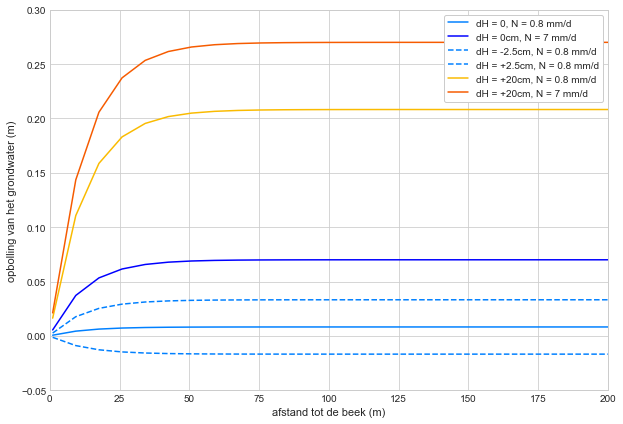

In [116]:
plt.rcParams['figure.figsize'] = [10, 7]
fig, ax = plt.subplots()

#4c4c4c gray
#f65b00 orange
#fabb01 yellow
#0000FF dark blue
#0080FF light blue

ax.plot(x, h0, '-', color='#0080FF', label='dH = 0, N = 0.8 mm/d');
ax.plot(x, h3, '-', color='#0000FF', label='dH = 0cm, N = 7 mm/d');
ax.plot(x, h1, '--', color='#0080FF', label='dH = -2.5cm, N = 0.8 mm/d');
ax.plot(x, h2, '--', color='#0080FF', label='dH = +2.5cm, N = 0.8 mm/d');
ax.plot(x, h4, '-', color='#fabb01', label='dH = +20cm, N = 0.8 mm/d');
ax.plot(x, h5, '-', color='#f65b00', label='dH = +20cm, N = 7 mm/d');

ax.set_ylim(-0.05, 0.3)
ax.set_xlim(0, L/2)
ax.set_xlabel('afstand tot de beek (m)',fontsize=11)
ax.set_ylabel('opbolling van het grondwater (m)', fontsize = 11)
#ax.set_title('')
#lg = ax.legend(loc="upper right")
ax.grid(True)
#legframe = plt.legend.get_frame()
#lg.get_frame().set_alpha(0.5)
#lg.get_frame().set_facecolor('white')
ax.legend(loc="upper right", fancybox=True, frameon=True, facecolor='white', framealpha=1, )

plt.show()

In [117]:
fig.savefig('wesseling_hx.png')

In [122]:
# slootafvoer
for q in [0.8/1000,7/1000,qd0,qd3,qd4,qd5]:
    m3dagkm = q*L*1000
    lsdkm = m3dagkm*1/86.4
    print(m3dagkm,lsdkm)

320.0 3.7037037037037033
2800.0000000000005 32.40740740740741
20.132792406436813 0.2330184306300557
171.46428199482023 1.9845403008659748
510.0307409630659 5.9031335759614105
661.3622305514493 7.65465544619733


In [123]:
# kwelflux
for q in [0.8/1000,7/1000,qs0,qs3,qs4,qs5]:
    m3dagkm = q*L*1000
    lsdkm = m3dagkm*1/86.4
    print(m3dagkm,lsdkm)

320.0 3.7037037037037033
2800.0000000000005 32.40740740740741
-308.63433088123435 -3.5721566074216935
-2628.53571800518 -30.422867106541435
181.26361767539473 2.097958537909661
-2138.637769448551 -24.752751961210077
